Nguyễn Ngọc Sáng (ngocsangvn@gmail.com, [VnCFD](https://vncfdgroup.wordpress.com/)), Zhukovsky 12/2018

*Thực hành CFD với Python!*

# Bài 2. Phương trình chuyển dịch tuyến tính một chiều

Phương trình chuyển dịch tuyến tính một chiều có dạng:

$$\frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = 0, c>0$$

Giả sử tại thời điểm ban đầu giá trị đại lượng u là U, khi đó phương trình trên mô tả quá trình dịch chuyển giá trị U với vận tốc c dọc theo trục x mà không thay đổi 'hình dạng' của nó. 

Cho điều kiện ban đầu $u(x, 0) = u_0(x)$. Nghiệm chính xác của phương trình là $u(x, t) = u_0(x - ct)$.

Trong phương trình này ngoài đạo hàm riêng theo không gian x, còn có đạo hàm riêng theo thời gian t. Do đó, ngoài lựa chọn phương pháp xấp xỉ không gian ta còn phải lựa chọn phương pháp 'xấp xỉ thời gian', hay nói cách khác phải tính toán theo thời gian như thế nào. Chúng ta có thể xây dựng vô số sơ đồ sai phân cho phương trình này, tuy nhiên không phải tất cả chúng đều dùng được, không phải cái nào cũng phù hợp. Dưới đây liệt kê một số sơ đồ thường dùng:
* **Sơ đồ ngược gió bậc một (First-oder Upwind)**

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^n - u_{i-1}^n}{\Delta x} = 0 \ (1)$$


* **Sơ đồ Euler ẩn bậc một**

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_i^{n+1} - u_{i-1}^{n+1}}{2\Delta x} = 0 \ (2)$$

* **Sơ đồ Lax-Wendroff bậc hai**

$$\frac{u_i^{n+1}-u_i^n}{\Delta t} + c \frac{u_{i+1}^n - u_{i-1}^n}{2\Delta x} = \frac {c^2\Delta t}{2} \frac{u_{i+1}^n - 2u_i^n + u_{i-1}^n}{\Delta x^2} \ (3)$$

* **Phương pháp dự báo hiệu chỉnh - MacCormack**

dự báo nghiệm: 

$$\overline{u_i^{n+1}} = u_i^n - c \frac{\Delta t}{\Delta x}(u_{i+1}^n - u_i^n)$$

hiệu chỉnh nghiệm:

$$u_i^{n+1} = \frac {1}{2} [u_i^n + \overline{u_i^{n+1}} - c \frac{\Delta t}{\Delta x} (\overline{u_i^{n+1}} - \overline {u_{i-1}^{n+1}})]$$

* **Phương pháp Runge-Kutta bậc 2**

Ở đây ta chỉ quan tâm tới tính toán theo thời gian. Viết lại phương trình dịch chuyển ở dạng: $u_t = R(u)$. Giải phương trình này qua hai bước:

Bước 1: $u^{(1)} = u^n + \Delta t R^n$

Bước 2: $u^{n+1} = u^n + \frac {\Delta t}{2} (R^n + R^{(1)})$

với $R^n = R(u^n) = -cu_x^n$

Ta làm quen với hai khái niệm, `sơ đồ tường mình` (sơ đồ hiện) và `sơ đồ ẩn`. Coi nghiệm u ở bước thời gian n ($u^n$) đã biết, cần tìm nghiệm ở bước thời gian tiếp theo n+1 ($u^{n+1}$). Như vậy, sơ đồ (1) chỉ chứa một biến ở bước thời gian n+1 gọi là sơ đồ tường minh, sơ đồ (2) chứa ba biến ở bước thời gian n+1 - sơ đồ ẩn. Phương pháp giải hai loại sơ đồ này khác nhau. Trong khuôn khổ bài 2 chúng ta chỉ xem xét sơ đồ tường minh. Để ý sơ đồ (2): xấp xỉ không gian bậc hai, xấp xỉ thời gian bậc một nên bậc của sơ đồ là bậc một.

Sơ đồ ngược gió bậc một
========
Biến đổi sơ đồ (1) ta có: $$u_i^{n+1} = u_i^n - c \frac{\Delta t}{\Delta x}(u_{i+1}^n - u_i^n)$$ 

Bây giờ ta sẽ sử dụng công thức này để tìm nghiệm của phương trình với điều kiện ban đầu:

$$u(x, 0) = 1 \ với 1\leq x\leq 2; u(x, 0) = 0 \ với x \ khác \ thuộc [0, 4]$$

Để tìm nghiệm tại thời gian T, ta sẽ chia nhỏ ra thành nt bước với thời gian từng bước dt=T/nt.

**Viết code thôi!!!**

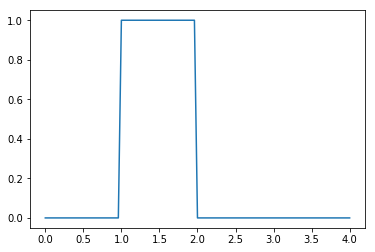

In [2]:
# “Talk is cheap. Show me the code.” ― Linus Torvalds 

import numpy as np # Gọi thư viện numpy bằng tên np
import matplotlib.pyplot as plt # Gọi thư viện pyplot 

#chỉ cần khi bạn sử dụng ipython notebook
%matplotlib inline 

#chia lưới 
nx = 101        # Số điểm lưới trên đoạn [0, 4]
dx = 4./(nx-1) # Độ dài ô lưới
x = np.linspace(0, 4, nx) #Ta dùng hàm linspace trong numpy dể chia lưới
#print (x) 

#chia thời gian: T = nt*dt 
nt = 50        # Số bước thời gian
dt = 0.01      # Bước thời gian

c = 1          # Tốc độ chuyển dịch

#Điều khiện ban đầu: 
#u(x, 0) = 1 trên đoạn [1, 2], = 0 trên phần còn lại
#Tạo mảng chứa u có độ dài nx, giá trị mỗi phần tử bằng 0 bằng hàm zeros trong numpy
u = np.zeros(nx) # array u gồm nx u[i], sô nguyên (integer) i chạy từ 0 tới nx-1

#Điều kiện trên đoạn [1, 2]
#Nghiệm u tại x = 1 được chứa tại phần tử u[i] của mảng u với i = int(1./dx) - lấy phần nguyên của phép chia 
u[int(1./dx) : int(2./dx)] = 1

#câu lệnh trên tương đương với:
#for i in range(int(1./dx), int(2./dx)): u[i] = 1

#Lưu gía trị ban đầu để so sánh ở cuối bài
u0 = u.copy(); #tạo ra bản copy của u
'''nếu bạn viết u0 = u, thì u0 là một tên gọi khác của u, tức là mọi thay đổi của u0 sẽ thay đổi u!'''
# '''____'''' - cách khác để viết chú thích 

#Vẽ đồ thị hàm u tại thời điểm ban đầu
plt.plot(x, u)
plt.show()

Như vậy, ta đã dùng mảng `u` để chứa nghiệm tại các điểm lưới ở thời điểm ban đầu ($u_i^0$). Để tìm nghiệm ở bước thời gian tiếp theo sau thời gian dt ($u_i^1$), ta dùng mảng `un` để lưu các giá trị $u_i^0$ sau đó tính $u_i^1$ theo công thức từ sơ đồ sai phân và lưu vào mảng `u`. Tiếp tục quá trình này sau nt bước ta thu được nghiệm cuối cùng.

In [4]:
un = np.zeros(nx) # tạo mảng chứa các giá trị tạm thời
for n in range (nt): # n chạy từ 0 tới nt-1 ->thực hiện nt bước
    un = u.copy() # Lưu nghiệm hiện tại
    for i in range (1, nx): # i chạy từ 1 tới nx-1, tại sao i bắt đầu từ 1 mà ko phải từ 0? Hãy thử thay 1 bằng 0
        u[i] = un[i] - c*dt/dx*(un[i] - un[i-1]) # Tính nghiệm ở bước tiếp theo
        
u_upwind = u.copy() #lưu nghiệm để so sánh ở cuối bài    
#print(u)

Bây giờ ta đã có thể so sánh nghiệm thu được và nghiệm chính xác. Sau thời gian $t = nt*dt$ 'sóng' đã dịch chuyển sang phải một đoạn $c*t$.

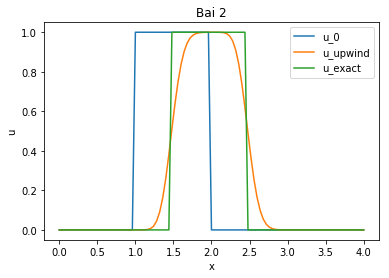

In [9]:
#tìm nghiệm chính xác 
u_exact = np.zeros(nx)
u_exact[int((1+c*nt*dt)/dx) : int((2+c*nt*dt)/dx)] = 1

#biểu diễn nghiệm 
plt.plot(x, u0, label='u_0')
plt.plot(x, u, label='u_upwind')
plt.plot(x, u_exact, label='u_exact')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Bai 2')
plt.legend()
#plt.savefig('Bai2.png') #lưu file ảnh định dạng .png
#plt.savefig('Bai2.pdf') #lưu file pdf 
plt.show()

Ta thấy, nghiệm thu được không được chính xác lắm, nó khá 'mượt mà' so với nghiệm chính xác. Để tăng độ chính xác các bạn hãy thử chia lưới nhỏ hơn, thay nx = 201, 301, 401. Nhưng chỉ cần $nx>401$ điều bất ngờ sẽ xảy ra. Hãy thử với $nx = 402$. Các bạn sẽ thu được kết quả như sau:
<img src="Bai_2_1.png" width="400">

"Thân sóng mọc thêm hai cái sừng, một sừng trên, một sừng dưới" - nói chuẩn thì là xuất hiện những `dao động` . Trong trường hợp này ta nói `sơ đồ không ổn định`. Lý do là...: sự ổn định của sơ đồ liên quan mật thiết tới `số Courant` hay `điều kiện Courant–Friedrichs–Lewy (CFL)`: với $\nu = c*dt/dx$, sơ đồ chỉ ổn định khi  $\nu \leq 1$. Khi nx >401, điều kiện này bị vi phạm. Nếu bạn tiếp tục tăng nx thì sẽ xuất hiện nhiều 'dao động' hơn và 'dao động' sẽ lớn hơn. 

Sơ đồ Lax-Wendroff bậc 2
====

Từ sơ đồ (3) ta thu được công thức:

$$u_i^{n+1} = u_i^n - \frac{c\Delta t}{2\Delta x}(u_{i+1}^n - u_{i-1}^n) + \frac {c^2 \Delta t^2}{\Delta x^2}(u_{i+1}^n - 2u_i^n +u_{i-1}^n)$$

Tiếp theo, thực hiện các bước tương tự như trên. Chỉ khác, ta sẽ khai báo (`def`) một hàm (`function`) tên là `solver` để thực hiện các thao tác lặp tìm nghiệm. Hàm có thể sử dụng nhiều lần trong chương trình. Hơn nữa thay vì sử dụng câu lệnh 'for i in range(nx)...' ta sẽ sử dụng thao tác với mảng của numpy. Ví dụ: 

u[:] ~ tương ứng u[i], $0\leq i\leq nx-1$

u[1:] ~ $1\leq i \leq nx-1$

u[:-1] ~ $0\leq i \leq nx-2$

u[1:-1] ~ $1\leq i \leq nx-2$

In [11]:
def solver():
    u = u0.copy() #Gán lại giá trị u ban đầu
    for n in range(nt):
        un = u.copy()
        u[1:-1] = (un[1:-1] - c*dt/(2*dx)*(un[2:] - un[0:-2]) +
                   c**2*dt**2/(2*dx**2)*(un[2:] - 2*un[1:-1] + un[0:-2]))
    return u #trả về giá trị u

u_lax_wendroff = solver() #gọi hàm solver - thực hiện tính toán - trả về giá trị u lưu tại u_lax_wendroff

Các thao tác với mảng có thể làm bạn thấy rắc rối hơn so với sử dụng vòng lặp for. Tuy nhiên nó lại tiết kiệm thời gian tính toán hơn nhiều, đặc biệt đối với mảng nhiều chiều. Bạn hãy thử viết chương trình kiểm chứng.
Bây giờ ta sẽ so sánh các kết quả tìm được.

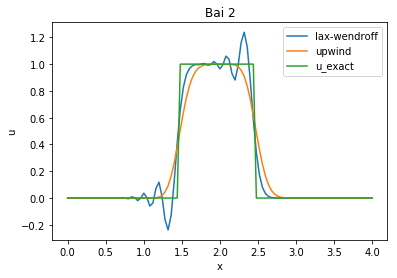

In [12]:
plt.plot(x, u_lax_wendroff, label='lax-wendroff')
plt.plot(x, u_upwind, label='upwind')
plt.plot(x, u_exact, label='u_exact')
plt.xlabel('x')
plt.ylabel('u')
plt.title('Bai 2')
plt.legend()
#plt.savefig('Bai_2.pdf') #lưu file pdf 
plt.show()

Sơ đồ Lax-Wendroff làm xuất hiện nhiều dao động, có phải nó đang không ổn định? Điều kiện ổn định của sơ đồ này cũng là $\nu \leq 1$. Rõ ràng điều kiện này đang thỏa mãn. Nên sơ đồ đang ổn định. Điểm khác biệt là những 'dao động' này vẫn ổn định theo thời gian, trong khi những 'dao động' trong trường hợp sơ đồ không ổn định sẽ thay đổi chóng mặt theo thời gian. Bạn hãy thử thay đổi nx, nt để kiểm tra.


Sự khác biệt trên giữa nghiệm của sơ đồ bậc một và bậc hai từ đâu mà có? Để hiểu vấn đề này ta sẽ biến đổi sơ đồ (1).
Thay biểu thức khai triển Taylor:
$$u_i^{n+1} = u_i^n + \Delta t \frac {\partial u}{\partial t} + \frac {(\Delta t)^2}{2} \frac{\partial^2 u}{\partial t^2} + O(\Delta t)^3$$

$$u_{i-1}^{n} = u_i^n - \Delta x \frac {\partial u}{\partial x} + \frac {(\Delta x)^2}{2} \frac{\partial^2 u}{\partial x^2} + O(\Delta x)^3$$

vào phương trình (1) ta thu được:

$$u_t + cu_x = -\frac{\Delta t}{2} u_{tt} + \frac {c\Delta x}{2} u_{xx} +... \ (4)$$

Đẳng thức này có vế trái là phương trình dịch chuyển, vế phải - sai số xấp xỉ khác không. Thay đạo hàm thời gian bằng đạo hàm không gian trong sai số xấp xỉ bằng các biến đổi:

$$u_{tt} + cu_{xt} = -\frac{\Delta t}{2} u_{ttt} + \frac {c\Delta x}{2} u_{xxt} +... (5)$$
$$u_{tx} + cu_{xx} = -\frac{\Delta t}{2} u_{ttx} + \frac {c\Delta x}{2} u_{xxx} +... (6)$$
$$(5)-c(6) => u_{tt} = c^2u_{xx} + (...)$$
Tương tự cho $u_{ttt}, u_{xxt}, u_{ttx}$ (tự biến đổi và tìm $\beta$), thay vào (4) ta có:

$$u_t + cu_x = \frac {c\Delta x}{2}(1-\nu) u_{xx} + \beta u_{xxx} + ... (7)$$
Rõ ràng đây không phải là phương trình nguyên mẫu. Phương trình này được gọi là `phương trình sửa đổi` (modified equation). Khi sử dụng sơ đồ sai phân (1), thực ra chúng ta đang giải phương trình (7). Trong phương trình này, hạng tử đạo hàm bậc hai trong biểu thức sai số xấp xỉ còn được gọi là `độ nhớt nhân tạo`. Tính nhớt sẽ làm cho lời giải trở nên 'mượt mà' hơn. `Hiệu ứng` này gọi là `tiêu tán` (dissipation). Nói chung, nó liên quan tới đạo hàm bậc chẵn trong sai số xấp xỉ. Đây là đặc trưng của sơ đồ bậc một.

Một hiệu ứng khác của sơ đồ sai phân được gọi là `phân tán` (dispersion). Nó được thể hiện, như ta đã phân tích, trên nghiệm sơ đồ Lax-Wendroff. Hiệu ứng này là kết quả do hạng tử đạo hàm bậc lẻ trong sai số xấp xỉ tạo ra. Đây đặc trưng của sơ đồ bậc hai.

Tổng hợp hai hiệu ứng này được gọi là `khuyếch tán` (diffusion). 

Kết quả trên chỉ ra rằng sơ đồ bậc 2 kém hơn sơ đồ bậc 1? Cũng phương trình chuyển dịch tuyến tính một chiều như trên, với điều kiện ban đầu $u_0 = sin(6*pi*x), 0\leq x\leq 1, nx = 51$, điều kiện biên tuần hoàn (sẽ học ở các bài sau), ta thu được kết quả như sau:

<img src="Bai_2_2.png" width=500>

So sánh kết quả hai bài toán, bạn hãy tự rút ra kết luận.

**Cuối cùng, các bạn hãy thử dùng các sơ đồ khác đã liệt kê ở trên và so sánh kết quả thu được. Hẵn sẽ rất thú vị!**

### [Bài 3. Phương trình truyền nhiệt một chiều (phương trình khuyếch tán)](Bai_3.ipynb)